In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 50.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

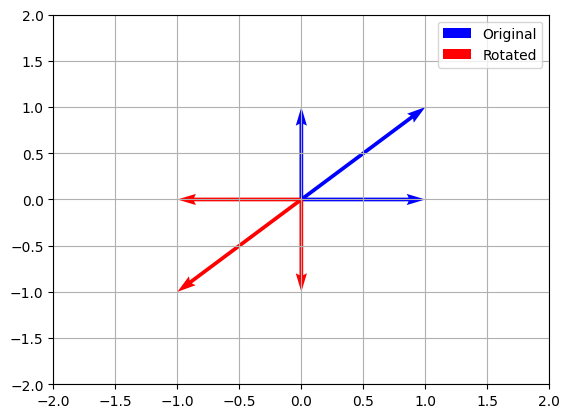

In [ ]:
vectors = np.array([[1, 0], [0, 1], [1, 1]])
origin = np.zeros((vectors.shape[0], 2))

theta = np.pi
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

rotated_vectors = vectors @ R.T

plt.quiver(*origin.T, vectors[:,0], vectors[:,1], color='blue', angles='xy', scale_units='xy', scale=1, label='Original')
plt.quiver(*origin.T, rotated_vectors[:,0], rotated_vectors[:,1], color='red', angles='xy', scale_units='xy', scale=1, label='Rotated')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.legend()
plt.show()


In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
vec = model["king"]
print(vec.shape)

(300,)


In [ ]:
vec

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

words = ["king", "queen", "man", "woman", "happy", "sad",
         "dog", "cat", "city", "village", "car", "bus",
         "love", "hate", "music", "hello", "world", "kebab", "doner", "baklava", "pussy"]

existing_words = [w for w in words if w in model]

X = np.array([model[w] for w in existing_words])

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

for word, (x, y) in zip(existing_words, X_2d):
    print(f"{word}: ({x:.3f}, {y:.3f})")


king: (0.323, 0.741)
queen: (0.369, 0.599)
man: (0.539, -0.687)
woman: (0.532, -0.990)
happy: (0.694, 0.610)
sad: (0.898, 0.785)
dog: (0.541, -0.653)
cat: (0.765, -0.526)
city: (0.185, -1.115)
village: (-0.153, -1.417)
car: (0.253, -1.165)
bus: (0.199, -1.308)
love: (0.628, 1.230)
hate: (0.764, 1.115)
music: (-0.016, 0.146)
hello: (0.331, 0.998)
world: (0.370, -0.084)
kebab: (-2.521, -0.170)
doner: (-1.987, 0.391)
baklava: (-2.929, 0.409)
pussy: (0.213, 1.092)


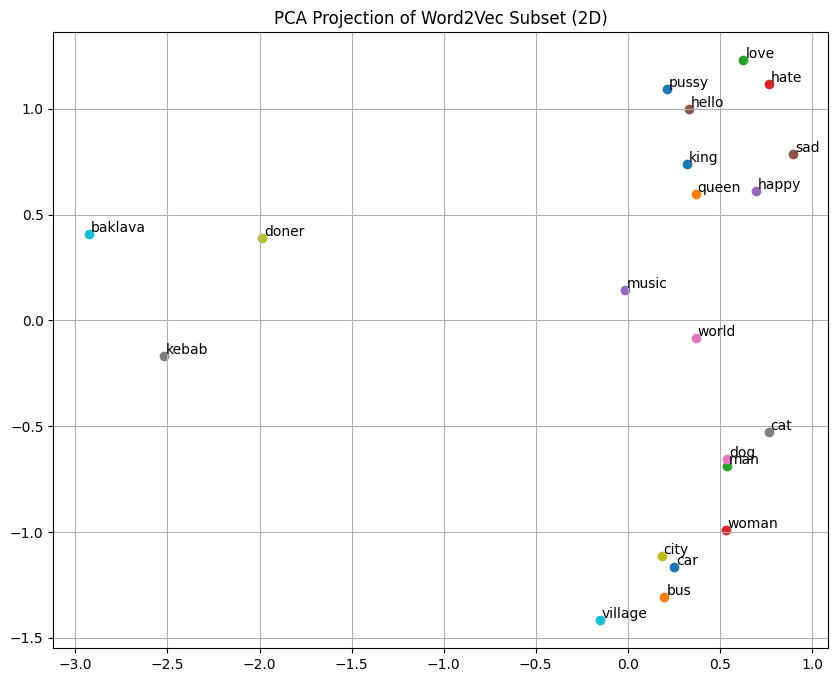

In [ ]:
plt.figure(figsize=(10, 8))

for word, (x, y) in zip(existing_words, X_2d):
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.title("PCA Projection of Word2Vec Subset (2D)")
plt.grid(True)
plt.show()


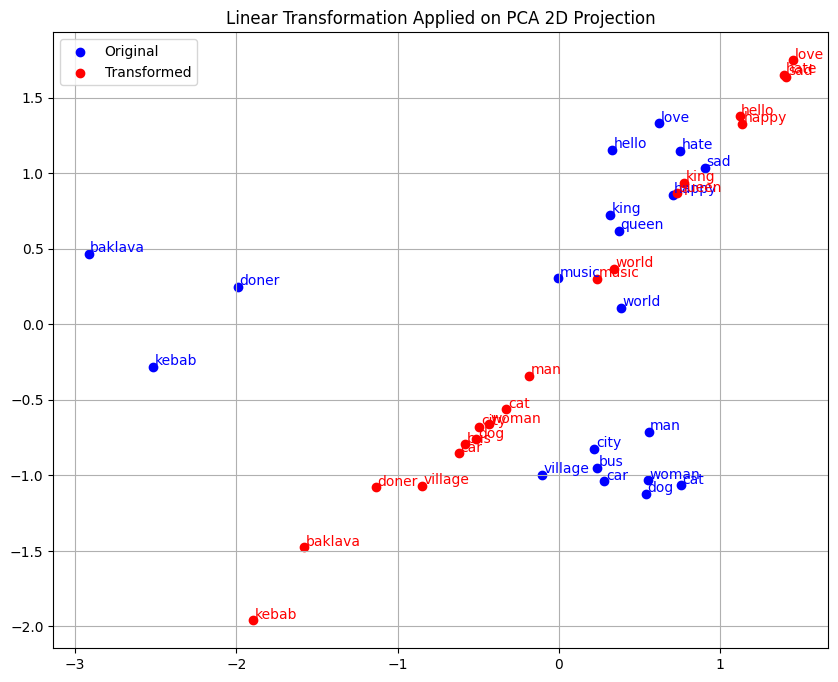

In [ ]:
theta = np.radians(45)
Rotation = np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]])

Scaling = np.array([[1.5, 0],
                    [0, 0.5]])

Shear = np.array([[1, 0.5],
                  [0, 1]])

Random = np.array([[1, 7], [6, 9]]) / 9
Transform = Random

X_transformed = X_2d @ Transform.T


plt.figure(figsize=(10, 8))

plt.scatter(X_2d[:, 0], X_2d[:, 1], color='blue', label='Original')
for word, (x, y) in zip(existing_words, X_2d):
    plt.text(x + 0.01, y + 0.01, word, color='blue')

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='red', label='Transformed')
for word, (x, y) in zip(existing_words, X_transformed):
    plt.text(x + 0.01, y + 0.01, word, color='red')

plt.title("Linear Transformation Applied on PCA 2D Projection")
plt.legend()
plt.grid(True)
plt.show()
